In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import date
import datetime
import time

import os, os.path
from os import listdir
from os.path import isfile, join

import re
# from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import sys

# search path for modules
# look @ https://stackoverflow.com/questions/67631/how-to-import-a-module-given-the-full-path
sys.path.append('/Users/hn/Documents/00_GitHub/Ag/NASA/Python_codes/')
import NASA_core as nc
import NASA_plot_core as npc

In [740]:
plot_dir = "/Users/hn/Documents/01_research_data/NASA/for_paper/plots/buckwheat_challenge/"
os.makedirs(plot_dir, exist_ok=True)

In [2]:
landsat_dir = "/Users/hn/Documents/01_research_data/NASA/VI_TS/data_for_train_individual_counties/"

sentinel_dir = "/Users/hn/Documents/01_research_data/remote_sensing/01_NDVI_TS/"+\
               "70_Cloud/00_Eastern_WA_withYear/2Years/"

In [3]:
landsat_fNames = ["L7_T1C2L2_Scaled_Grant2017_2016-01-01_2018-10-14.csv",
                  "L7_T1C2L2_Scaled_FranklinYakima2018_2017-01-01_2019-10-14.csv",
                  "L8_T1C2L2_Scaled_FranklinYakima2018_2017-01-01_2019-10-14.csv",
                  "L8_T1C2L2_Scaled_Grant2017_2016-01-01_2018-10-14.csv"]

sentinel_fNames = ["Eastern_WA_2017_70cloud_selectors.csv", 
                   "Eastern_WA_2018_70cloud_selectors.csv"]

In [4]:
field_IDs = ["102715_WSDA_SF_2018", "105081_WSDA_SF_2017"]
landsat_DF = pd.DataFrame()
sentinel_DF = pd.DataFrame()

In [5]:
for fName in landsat_fNames:
    curr = pd.read_csv(landsat_dir+fName)
    curr = curr[curr.ID.isin(field_IDs)]
    landsat_DF=pd.concat([landsat_DF, curr])

In [9]:
print (landsat_DF.shape)
landsat_DF.head(2)

,ID,NDVI,EVI,system_start_time
8311,105081_WSDA_SF_2017,-0.031312,-0.195314,1.451761e+12
26016,105081_WSDA_SF_2017,NaN,NaN,NaN


In [10]:
for fName in sentinel_fNames:
    curr = pd.read_csv(sentinel_dir+fName)
    curr = curr[curr.ID.isin(field_IDs)]
    sentinel_DF=pd.concat([sentinel_DF, curr])

In [12]:
out_name = sentinel_dir + "buckwheat_challenge_sentinel_DF.csv"
sentinel_DF.to_csv(out_name, index = False)
print (sentinel_DF.ID.unique())
sentinel_DF.head(2)

,ID,Acres,BSI,county,CropGrp,CropTyp,DataSrc,doy,EVI,ExctAcr,...,NDWI,Notes,PSRI,RtCrpTy,Shap_Ar,Shp_Lng,system_start_time,TRS,image_year,B8
73044,105081_WSDA_SF_2017,49.0,NaN,Grant,Cereal Grain,buckwheat,wsda,NaN,NaN,49.106159,...,NaN,9/6/2011 new lateral move cp,NaN,Timothy,198725.57636,1873.048697,NaN,T19R24E25,NaN,NaN
247431,105081_WSDA_SF_2017,49.0,-0.349168,Grant,Cereal Grain,buckwheat,wsda,215.0,0.743564,49.106159,...,-0.565784,9/6/2011 new lateral move cp,-0.094703,Timothy,198725.57636,1873.048697,1.470250e+12,T19R24E25,2016.0,0.384654


In [19]:
landsat_evi = landsat_DF.copy()
landsat_ndvi = landsat_DF.copy()

landsat_evi = landsat_evi.drop(columns=['NDVI'])
landsat_ndvi = landsat_ndvi.drop(columns=['EVI'])

landsat_evi = landsat_evi[landsat_evi["EVI"].notna()]
landsat_ndvi = landsat_ndvi[landsat_ndvi["NDVI"].notna()]


landsat_evi = nc.add_human_start_time_by_system_start_time(landsat_evi)
landsat_ndvi = nc.add_human_start_time_by_system_start_time(landsat_ndvi)

landsat_evi.sort_values(by=["ID", 'human_system_start_time'], inplace=True)
landsat_ndvi.sort_values(by=["ID", 'human_system_start_time'], inplace=True)

landsat_evi.reset_index(drop=True, inplace=True)
landsat_ndvi.reset_index(drop=True, inplace=True)

In [21]:
landsat_evi.head(2)

,ID,EVI,system_start_time,human_system_start_time
0,102715_WSDA_SF_2018,0.336750,1.483642e+12,2017-01-05
1,102715_WSDA_SF_2018,3.365693,1.485024e+12,2017-01-21


In [22]:
sentinel_evi = sentinel_DF.copy()
sentinel_ndvi = sentinel_DF.copy()

sentinel_evi = sentinel_evi.drop(columns=['NDVI'])
sentinel_ndvi = sentinel_ndvi.drop(columns=['EVI'])

sentinel_evi = sentinel_evi[sentinel_evi["EVI"].notna()]
sentinel_ndvi = sentinel_ndvi[sentinel_ndvi["NDVI"].notna()]


sentinel_evi = nc.add_human_start_time_by_system_start_time(sentinel_evi)
sentinel_ndvi = nc.add_human_start_time_by_system_start_time(sentinel_ndvi)

sentinel_evi.sort_values(by=["ID", 'human_system_start_time'], inplace=True)
sentinel_ndvi.sort_values(by=["ID", 'human_system_start_time'], inplace=True)

sentinel_evi.reset_index(drop=True, inplace=True)
sentinel_ndvi.reset_index(drop=True, inplace=True)

sentinel_evi.head(2)

,ID,Acres,BSI,county,CropGrp,CropTyp,DataSrc,doy,EVI,ExctAcr,...,Notes,PSRI,RtCrpTy,Shap_Ar,Shp_Lng,system_start_time,TRS,image_year,B8,human_system_start_time
0,102715_WSDA_SF_2018,47.0,-0.056224,Franklin,Cereal Grain,buckwheat,wsda,214.0,0.386047,47.417159,...,NaN,0.014623,"Corn, Field",191890.435525,1750.451846,1.501787e+12,T12R29E30,2017.0,0.337881,2017-08-03
1,102715_WSDA_SF_2018,47.0,-0.183376,Franklin,Cereal Grain,buckwheat,wsda,219.0,0.656737,47.417159,...,NaN,-0.065144,"Corn, Field",191890.435525,1750.451846,1.502219e+12,T12R29E30,2017.0,0.369195,2017-08-08


# Pick proper year!

In [72]:
sentinel_ndvi_field_1 = sentinel_ndvi[sentinel_ndvi.ID==field_IDs[0]].copy()
sentinel_ndvi_field_2 = sentinel_ndvi[sentinel_ndvi.ID==field_IDs[1]].copy()

yr = sentinel_ndvi_field_1.ID.unique()[0].split("_")[-1]
march= yr+"-03-01"
sentinel_ndvi_field_1 = sentinel_ndvi_field_1[sentinel_ndvi_field_1.human_system_start_time>=march]
nov= yr+"-11-01"
sentinel_ndvi_field_1 = sentinel_ndvi_field_1[sentinel_ndvi_field_1.human_system_start_time<=nov]

yr = sentinel_ndvi_field_2.ID.unique()[0].split("_")[-1]
march= yr+"-03-01"
sentinel_ndvi_field_2 = sentinel_ndvi_field_2[sentinel_ndvi_field_2.human_system_start_time>=march]
nov= yr+"-11-01"
sentinel_ndvi_field_2 = sentinel_ndvi_field_2[sentinel_ndvi_field_2.human_system_start_time<=nov]


landsat_ndvi_field_1 = landsat_ndvi[landsat_ndvi.ID==field_IDs[0]].copy()
landsat_ndvi_field_2 = landsat_ndvi[landsat_ndvi.ID==field_IDs[1]].copy()

yr = landsat_ndvi_field_1.ID.unique()[0].split("_")[-1]
march= yr+"-03-01"
landsat_ndvi_field_1 = landsat_ndvi_field_1[landsat_ndvi_field_1.human_system_start_time>=march]
nov= yr+"-11-01"
landsat_ndvi_field_1 = landsat_ndvi_field_1[landsat_ndvi_field_1.human_system_start_time<=nov]

yr = landsat_ndvi_field_2.ID.unique()[0].split("_")[-1]
march= yr+"-03-01"
landsat_ndvi_field_2 = landsat_ndvi_field_2[landsat_ndvi_field_2.human_system_start_time>=march]
nov= yr+"-11-01"
landsat_ndvi_field_2 = landsat_ndvi_field_2[landsat_ndvi_field_2.human_system_start_time<=nov]


In [73]:
landsat_ndvi = pd.concat([landsat_ndvi_field_1, landsat_ndvi_field_2])
sentinel_ndvi = pd.concat([sentinel_ndvi_field_1, sentinel_ndvi_field_2])

In [74]:
landsat_ndvi.head(2)

,ID,NDVI,system_start_time,human_system_start_time
29,102715_WSDA_SF_2018,0.158547,1.520276e+12,2018-03-05
30,102715_WSDA_SF_2018,0.152426,1.522349e+12,2018-03-29


In [75]:
sentinel_ndvi.head(2)

,ID,Acres,BSI,county,CropGrp,CropTyp,DataSrc,doy,ExctAcr,IntlSrD,...,Notes,PSRI,RtCrpTy,Shap_Ar,Shp_Lng,system_start_time,TRS,image_year,B8,human_system_start_time
16,102715_WSDA_SF_2018,47.0,0.119421,Franklin,Cereal Grain,buckwheat,wsda,64.0,47.417159,2005/08/15 00:00:00,...,NaN,0.171847,"Corn, Field",191890.435525,1750.451846,1.520362e+12,T12R29E30,2018.0,0.287491,2018-03-06
17,102715_WSDA_SF_2018,47.0,0.129132,Franklin,Cereal Grain,buckwheat,wsda,69.0,47.417159,2005/08/15 00:00:00,...,NaN,0.171138,"Corn, Field",191890.435525,1750.451846,1.520795e+12,T12R29E30,2018.0,0.287464,2018-03-11


In [ ]:
size = 20
title_FontSize = 10
legend_FontSize = 8
tick_FontSize = 12
label_FontSize = 14

params = {'legend.fontsize': 15, # medium, large
          # 'figure.figsize': (6, 4),
          'axes.labelsize': size,
          'axes.titlesize': size*1.2,
          'xtick.labelsize': size, #  * 0.75
          'ytick.labelsize': size, #  * 0.75
          'axes.titlepad': 10}

#
#  Once set, you cannot change them, unless restart the notebook
#
plt.rc('font', family = 'Palatino')
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['ytick.labelleft'] = True
plt.rcParams.update(params)
# pylab.rcParams.update(params)
# plt.rc('text', usetex=True)

In [170]:
def plot_oneColumn_CropTitle_scatter(raw_dt, ax, titlee, idx="NDVI", 
                                     _label = "raw", _color="red", 
                                     _marker_shape="+",
                                     marker_size=60):

    ax.scatter(raw_dt['human_system_start_time'], raw_dt[idx], 
               marker=_marker_shape, s=marker_size, c=_color, label=_label)

    ax.set_title(titlee)
    ax.set_ylabel(idx) # , labelpad=20); # fontsize = label_FontSize,
    ax.tick_params(axis='y', which='major') #, labelsize = tick_FontSize)
    ax.tick_params(axis='x', which='major') #, labelsize = tick_FontSize) # 
    ax.legend(loc="upper right");
    plt.yticks(np.arange(0, 1, 0.2))
    # ax.xaxis.set_major_locator(mdates.YearLocator(1))
    ax.set_ylim(-0.1, 1.5)

In [171]:
color_dict = {'landsat': 'dodgerblue',
              'sentinel': 'red'}

# Marker shapes: https://matplotlib.org/stable/api/markers_api.html
style_dict = {'landsat': 'v',
              'sentinel': 'D',
             }

In [ ]:
from matplotlib.text import OffsetFrom

Field 2's ID is ['105081_WSDA_SF_2017']


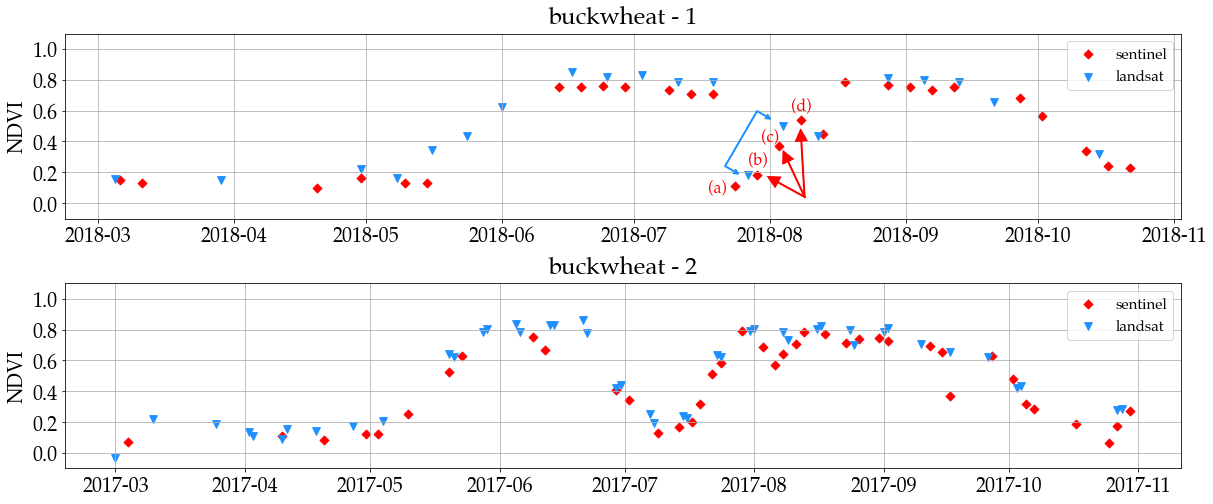

In [862]:
indeks="NDVI"

fig, axs = plt.subplots(2, 1, figsize=(20, 8), sharex=False, sharey='col', # sharex=True, sharey=True,
                       gridspec_kw={'hspace': 0.35, 'wspace': .05});
(ax1, ax2) = axs; ax1.grid(True); ax2.grid(True)

################  Field 1
curr_raw = sentinel_ndvi[sentinel_ndvi.ID == field_IDs[0]].copy()
curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
titlee = " ".join(curr_raw.CropTyp.unique()[0].split(", ")[::-1]) + " - 1"

plot_oneColumn_CropTitle_scatter(raw_dt = curr_raw, ax=ax1, idx=indeks, titlee=titlee,
                                 _label = "sentinel", marker_size=40,
                                 _color=color_dict["sentinel"], _marker_shape=style_dict["sentinel"])

curr_raw = landsat_ndvi[landsat_ndvi.ID == field_IDs[0]].copy()
curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
plot_oneColumn_CropTitle_scatter(raw_dt = curr_raw, ax=ax1, idx=indeks, titlee=titlee, 
                                  _label = "landsat", _color=color_dict["landsat"], 
                                 _marker_shape=style_dict["landsat"])

ax1.annotate('', 
             xy=(0.515, 0.57), 
             xytext=(32, 55),
             xycoords='figure fraction',
             textcoords='offset points',
             arrowprops=dict(arrowstyle="<->", connectionstyle="bar",
                             color="dodgerblue", lw=2, # shrinkA=0.01, shrinkB=0.01
                            ),
            horizontalalignment='right', verticalalignment='top', clip_on=True)

ax1.annotate('', 
            xy=(pd.Timestamp(2018, 7, 31), 0.18),
            xytext=(40, -22),
            xycoords='data',
            textcoords='offset points',
            arrowprops=dict(color="red", shrink=0.05, width=1),
            horizontalalignment='left',
            verticalalignment='bottom',
            clip_on=True)

ax1.annotate('(a)', color='red',
             xy=(pd.Timestamp(2018, 7, 17), 0.52),
             xytext=(4, -68), xycoords='data',
             textcoords='offset points',
             fontsize=16,
             # horizontalalignment='right',
             # verticalalignment='top',
             clip_on=True)


ax1.annotate('(b)', color='red',
             xy=(pd.Timestamp(2018, 7, 26), 0.7),
             xytext=(4, -68), xycoords='data',
             textcoords='offset points',
             fontsize=16,
             # horizontalalignment='right',
             # verticalalignment='top',
             clip_on=True)


ax1.annotate('(c)', color='red',
             xy=(pd.Timestamp(2018, 7, 29), 0.85),
             xytext=(4, -68), xycoords='data',
             textcoords='offset points',
             fontsize=16,
             # horizontalalignment='right',
             # verticalalignment='top',
             clip_on=True)

ax1.annotate('(d)', color='red',
             xy=(pd.Timestamp(2018, 8, 5), 1.05),
             xytext=(4, -68), xycoords='data',
             textcoords='offset points',
             fontsize=16,
             # horizontalalignment='right',
             # verticalalignment='top',
             clip_on=True)


ax1.annotate('', 
            xy=(pd.Timestamp(2018, 8, 4), 0.34),
            xytext=(22, -47),
            xycoords='data',
            textcoords='offset points',
            arrowprops=dict(color="red", shrinkA=0.5, shrinkB=0.5, width=1),
            # horizontalalignment='right',
            # verticalalignment='top',
            clip_on=True)

ax1.annotate('', 
            xy=(pd.Timestamp(2018, 8, 8), 0.48),
            xytext=(4, -68),
            xycoords='data',
            textcoords='offset points',
            arrowprops=dict(color="red", shrinkA=0.5, shrinkB=0.5, width=1),
            # horizontalalignment='right',
            # verticalalignment='top',
            clip_on=True)


# ax1.annotate(r"$\{$", fontsize=80, rotation=-35, color="dodgerblue",
#             xy=(0.485, 0.6), xycoords='figure fraction')

# ax1.annotate('', 
#              xy=(0.52, 0.57), 
#              xytext=(-40, 30), 
#              xycoords='figure fraction', 
#              textcoords='offset points',
#              arrowprops=dict(arrowstyle="->", color="dodgerblue", shrinkA=0.05, shrinkB=0.05),
#              clip_on=True, horizontalalignment='right')

# ax1.annotate('',
#             xy=(0.515, 0.58),
#             xytext=(-20, 52),
#             xycoords='figure fraction',
#             textcoords='offset points',
#             arrowprops=dict(color="dodgerblue", shrink=0.05, width=3),
#             horizontalalignment='left',
#             verticalalignment='bottom',
#             clip_on=True)

# ax1.annotate('', 
#              xy=(0.555, 0.62), 
#              xytext=(-40, -30),
#              xycoords='figure fraction',
#              textcoords='offset points',
#              arrowprops=dict(arrowstyle="<->", connectionstyle="bar",
#                              color="red", lw=2, # shrinkA=0.01, shrinkB=0.01
#                             ),
#             horizontalalignment='left', verticalalignment='bottom', clip_on=True)


################
################  Field 2 - axis 2
currID=field_IDs[1]
print ("Field 2's ID is", [currID])
curr_raw = sentinel_ndvi[sentinel_ndvi.ID == currID].copy()
curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
titlee = " ".join(curr_raw.CropTyp.unique()[0].split(", ")[::-1]) + " - 2"

plot_oneColumn_CropTitle_scatter(raw_dt = curr_raw, ax=ax2, idx=indeks, titlee=titlee,
                                 _label = "sentinel", marker_size=40,
                                 _color=color_dict["sentinel"], _marker_shape=style_dict["sentinel"])

curr_raw = landsat_ndvi[landsat_ndvi.ID == currID].copy()
curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
plot_oneColumn_CropTitle_scatter(raw_dt = curr_raw, ax=ax2, idx=indeks, titlee=titlee, 
                                  _label = "landsat", _color=color_dict["landsat"], 
                                 _marker_shape=style_dict["landsat"])

# ax2.annotate(r"$\{$", fontsize=80, rotation=-35, color="dodgerblue",
#              xy=(0.8, 0.5), 
#              xycoords="figure fraction",
#              xytext=(600, 100),
#              textcoords=OffsetFrom(ax2.bbox, (0, 0), "points"),
#              ha="center", va="center",
#              # bbox=bbox_args,
#              # arrowprops=arrow_args
#             )


ax2.set_ylim(-0.1, 1.1)
ax2.set_yticks(np.arange(0, 1.1, 0.2));

################
################  Save
################
file_name = plot_dir + "buckwheat_challenge_" + indeks + ".pdf"
plt.savefig(fname = file_name, dpi=400, bbox_inches='tight', transparent=False);


# EVI

In [745]:
sentinel_evi_field_1 = sentinel_evi[sentinel_evi.ID==field_IDs[0]].copy()
sentinel_evi_field_2 = sentinel_evi[sentinel_evi.ID==field_IDs[1]].copy()

yr = sentinel_evi_field_1.ID.unique()[0].split("_")[-1]
march= yr+"-03-01"
sentinel_evi_field_1 = sentinel_evi_field_1[sentinel_evi_field_1.human_system_start_time>=march]
nov= yr+"-11-01"
sentinel_evi_field_1 = sentinel_evi_field_1[sentinel_evi_field_1.human_system_start_time<=nov]

yr = sentinel_evi_field_2.ID.unique()[0].split("_")[-1]
march= yr+"-03-01"
sentinel_evi_field_2 = sentinel_evi_field_2[sentinel_evi_field_2.human_system_start_time>=march]
nov= yr+"-11-01"
sentinel_evi_field_2 = sentinel_evi_field_2[sentinel_evi_field_2.human_system_start_time<=nov]


landsat_evi_field_1 = landsat_evi[landsat_evi.ID==field_IDs[0]].copy()
landsat_evi_field_2 = landsat_evi[landsat_evi.ID==field_IDs[1]].copy()

yr = landsat_evi_field_1.ID.unique()[0].split("_")[-1]
march= yr+"-03-01"
landsat_evi_field_1 = landsat_evi_field_1[landsat_evi_field_1.human_system_start_time>=march]
nov= yr+"-11-01"
landsat_evi_field_1 = landsat_evi_field_1[landsat_evi_field_1.human_system_start_time<=nov]

yr = landsat_evi_field_2.ID.unique()[0].split("_")[-1]
march= yr+"-03-01"
landsat_evi_field_2 = landsat_evi_field_2[landsat_evi_field_2.human_system_start_time>=march]
nov= yr+"-11-01"
landsat_evi_field_2 = landsat_evi_field_2[landsat_evi_field_2.human_system_start_time<=nov]


landsat_evi = pd.concat([landsat_evi_field_1, landsat_evi_field_2])
sentinel_evi = pd.concat([sentinel_evi_field_1, sentinel_evi_field_2])

Field 2's ID is ['105081_WSDA_SF_2017']


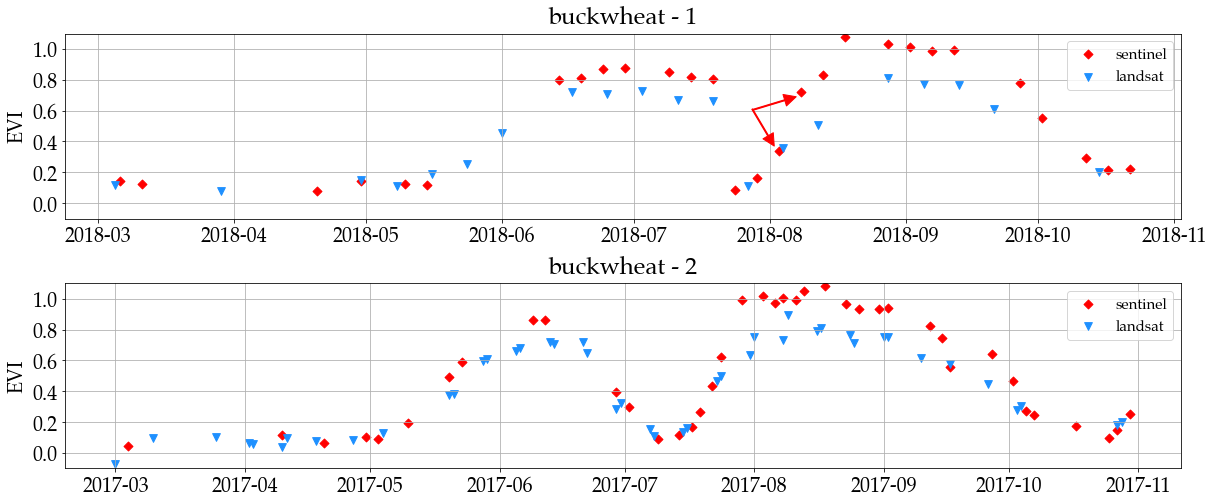

In [815]:
indeks="EVI"
fig, axs = plt.subplots(2, 1, figsize=(20, 8), sharex=False, sharey='col', # sharex=True, sharey=True,
                       gridspec_kw={'hspace': 0.35, 'wspace': .05});
(ax1, ax2) = axs; ax1.grid(True); ax2.grid(True)

################  Field 1
curr_raw = sentinel_evi[sentinel_evi.ID == field_IDs[0]].copy()
curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
titlee = " ".join(curr_raw.CropTyp.unique()[0].split(", ")[::-1]) + " - 1"

plot_oneColumn_CropTitle_scatter(raw_dt = curr_raw, ax=ax1, idx=indeks, titlee=titlee,
                                 _label = "sentinel", marker_size=40,
                                 _color=color_dict["sentinel"], _marker_shape=style_dict["sentinel"])

curr_raw = landsat_evi[landsat_evi.ID == field_IDs[0]].copy()
curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
plot_oneColumn_CropTitle_scatter(raw_dt = curr_raw, ax=ax1, idx=indeks, titlee=titlee, 
                                  _label = "landsat", _color=color_dict["landsat"], 
                                 _marker_shape=style_dict["landsat"])

ax1.annotate('', 
            xy=(pd.Timestamp(2018, 8, 2), 0.37),
            xytext=(-22, 37),
            xycoords='data',
            textcoords='offset points',
            arrowprops=dict(color="red", shrinkA=0.5, shrinkB=0.5, width=1),
            # horizontalalignment='right',
            # verticalalignment='top',
            clip_on=True)

ax1.annotate('', 
            xy=(pd.Timestamp(2018, 8, 7), 0.69),
            xytext=(-43, -13),
            xycoords='data',
            textcoords='offset points',
            arrowprops=dict(color="red", shrinkA=0.5, shrinkB=0.5, width=1),
            # horizontalalignment='right',
            # verticalalignment='top',
            clip_on=True)
################
################  Field 2 - axis 2
currID=field_IDs[1]
print ("Field 2's ID is", [currID])
curr_raw = sentinel_evi[sentinel_evi.ID == currID].copy()
curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
titlee = " ".join(curr_raw.CropTyp.unique()[0].split(", ")[::-1]) + " - 2"

plot_oneColumn_CropTitle_scatter(raw_dt = curr_raw, ax=ax2, idx=indeks, titlee=titlee,
                                 _label = "sentinel", marker_size=40,
                                 _color=color_dict["sentinel"], _marker_shape=style_dict["sentinel"])

curr_raw = landsat_evi[landsat_evi.ID == currID].copy()
curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
plot_oneColumn_CropTitle_scatter(raw_dt = curr_raw, ax=ax2, idx=indeks, titlee=titlee, 
                                  _label = "landsat", _color=color_dict["landsat"], 
                                 _marker_shape=style_dict["landsat"])
ax2.set_ylim(-0.1, 1.1)
ax2.set_yticks(np.arange(0, 1.1, 0.2));

################
################  Save
################
file_name = plot_dir + "buckwheat_challenge_" + indeks + ".pdf"
plt.savefig(fname = file_name, dpi=400, bbox_inches='tight', transparent=False);


In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=3)

ax.annotate(
    'straight',
    xy=(0, 1), xycoords='data',
    xytext=(-50, 30), textcoords='offset points',
    arrowprops=dict(arrowstyle="->"))

ax.annotate(
    'arc3,\nrad 0.2',
    xy=(0.5, -1), xycoords='data',
    xytext=(-80, -60), textcoords='offset points',
    arrowprops=dict(arrowstyle="->",
                    connectionstyle="arc3,rad=.2"))
ax.annotate(
    'arc,\nangle 50',
    xy=(1., 1), xycoords='data',
    xytext=(-90, 50), textcoords='offset points',
    arrowprops=dict(arrowstyle="->",
                    connectionstyle="arc,angleA=0,armA=50,rad=10"))
ax.annotate(
    'arc,\narms',
    xy=(1.5, -1), xycoords='data',
    xytext=(-80, -60), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        connectionstyle="arc,angleA=0,armA=40,angleB=-90,armB=30,rad=7"))
ax.annotate(
    'angle,\nangle 90',
    xy=(2., 1), xycoords='data',
    xytext=(-70, 30), textcoords='offset points',
    arrowprops=dict(arrowstyle="->",
                    connectionstyle="angle,angleA=0,angleB=90,rad=10"))
ax.annotate(
    'angle3,\nangle -90',
    xy=(2.5, -1), xycoords='data',
    xytext=(-80, -60), textcoords='offset points',
    arrowprops=dict(arrowstyle="->",
                    connectionstyle="angle3,angleA=0,angleB=-90"))
ax.annotate(
    'angle,\nround',
    xy=(3., 1), xycoords='data',
    xytext=(-60, 30), textcoords='offset points',
    bbox=dict(boxstyle="round", fc="0.8"),
    arrowprops=dict(arrowstyle="->",
                    connectionstyle="angle,angleA=0,angleB=90,rad=10"))
ax.annotate(
    'angle,\nround4',
    xy=(3.5, -1), xycoords='data',
    xytext=(-70, -80), textcoords='offset points',
    size=20,
    bbox=dict(boxstyle="round4,pad=.5", fc="0.8"),
    arrowprops=dict(arrowstyle="->",
                    connectionstyle="angle,angleA=0,angleB=-90,rad=10"))
ax.annotate(
    'angle,\nshrink',
    xy=(4., 1), xycoords='data',
    xytext=(-60, 30), textcoords='offset points',
    bbox=dict(boxstyle="round", fc="0.8"),
    arrowprops=dict(arrowstyle="->",
                    shrinkA=0, shrinkB=10,
                    connectionstyle="angle,angleA=0,angleB=90,rad=10"))
# You can pass an empty string to get only annotation arrows rendered
ax.annotate('', xy=(4., 1.), xycoords='data',
            xytext=(4.5, -1), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="bar",
                            ec="k",
                            shrinkA=5, shrinkB=5))

ax.set(xlim=(-1, 5), ylim=(-4, 3))

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")

# Here we'll demonstrate the extents of the coordinate system and how
# we place annotating text.

ax1.annotate('figure fraction : 0, 0', xy=(0, 0), xycoords='figure fraction',
             xytext=(20, 20), textcoords='offset points',
             ha="left", va="bottom",
             bbox=bbox_args,
             arrowprops=arrow_args)

ax1.annotate('figure fraction : 1, 1', xy=(1, 1), xycoords='figure fraction',
             xytext=(-20, -20), textcoords='offset points',
             ha="right", va="top",
             bbox=bbox_args,
             arrowprops=arrow_args)

ax1.annotate('axes fraction : 0, 0', xy=(0, 0), xycoords='axes fraction',
             xytext=(20, 20), textcoords='offset points',
             ha="left", va="bottom",
             bbox=bbox_args,
             arrowprops=arrow_args)

ax1.annotate('axes fraction : 1, 1', xy=(1, 1), xycoords='axes fraction',
             xytext=(-20, -20), textcoords='offset points',
             ha="right", va="top",
             bbox=bbox_args,
             arrowprops=arrow_args)

# It is also possible to generate draggable annotations

an1 = ax1.annotate('Drag me 1', xy=(.5, .7), xycoords='data',
                   ha="center", va="center",
                   bbox=bbox_args)

an2 = ax1.annotate('Drag me 2', xy=(.5, .5), xycoords=an1,
                   xytext=(.5, .3), textcoords='axes fraction',
                   ha="center", va="center",
                   bbox=bbox_args,
                   arrowprops=dict(patchB=an1.get_bbox_patch(),
                                   connectionstyle="arc3,rad=0.2",
                                   **arrow_args))
an1.draggable()
an2.draggable()

an3 = ax1.annotate('', xy=(.5, .5), xycoords=an2,
                   xytext=(.5, .5), textcoords=an1,
                   ha="center", va="center",
                   bbox=bbox_args,
                   arrowprops=dict(patchA=an1.get_bbox_patch(),
                                   patchB=an2.get_bbox_patch(),
                                   connectionstyle="arc3,rad=0.2",
                                   **arrow_args))

# Finally we'll show off some more complex annotation and placement

text = ax2.annotate('xy=(0, 1)\nxycoords=("data", "axes fraction")',
                    xy=(0, 1), xycoords=("data", 'axes fraction'),
                    xytext=(0, -20), textcoords='offset points',
                    ha="center", va="top",
                    bbox=bbox_args,
                    arrowprops=arrow_args)

ax2.annotate('xy=(0.5, 0)\nxycoords=artist',
             xy=(0.5, 0.), xycoords=text,
             xytext=(0, -20), textcoords='offset points',
             ha="center", va="top",
             bbox=bbox_args,
             arrowprops=arrow_args)

ax2.annotate('xy=(0.8, 0.5)\nxycoords=ax1.transData',
             xy=(0.8, 0.5), xycoords=ax1.transData,
             xytext=(10, 10),
             textcoords=OffsetFrom(ax2.bbox, (0, 0), "points"),
             ha="left", va="bottom",
             bbox=bbox_args,
             arrowprops=arrow_args)

ax2.set(xlim=[-2, 2], ylim=[-2, 2])
plt.show()